# 对数几率回归

## 考虑二分类问题，对于二分类问题只有0和1，因此需要将结果映射为0和1即可，常用的函数为sigmoid函数

In [1]:
import numpy as np
from sklearn.datasets import load_iris,make_classification
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sigmoid = lambda x:1./(1+np.exp(-x))

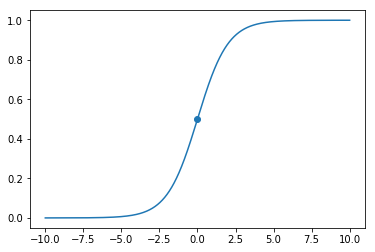

In [3]:
x = np.linspace(-10,10,10000)
y = sigmoid(x)
plt.plot(x,y)
plt.scatter(0,sigmoid(0))

### 上述就是sigmoid函数

### 读取数据

In [8]:
data = load_iris()
X = data.data[data.target != 0]
print(X.shape)
y = data.target[data.target != 0]
#print(y)
y[y == 1] = 0
y[y == 2] = 1
Y = y.reshape(-1,1)

(100, 4)


In [61]:
X[:5],Y[:5]

(array([[ 7. ,  3.2,  4.7,  1.4],
        [ 6.4,  3.2,  4.5,  1.5],
        [ 6.9,  3.1,  4.9,  1.5],
        [ 5.5,  2.3,  4. ,  1.3],
        [ 6.5,  2.8,  4.6,  1.5]]), array([[0],
        [0],
        [0],
        [0],
        [0]]))

## 定义对数几率回归的梯度下降解法

* 根据西瓜书中的说法，逻辑回归是不怎么准确的，应该使用对数几率回归，简称对数回归

In [21]:
class LogisticRegression(object):
    def __init__(self):
        self.sigmoid = lambda x:1./(1+np.exp(-x))
    def fit(self, X, y):
        self.w = np.random.randn(X.shape[1],1)
        for _ in range(10000):
            y_pred = self.sigmoid(X @ self.w)
            self.w -= 0.01 * X.T @ (y_pred - y) #梯度下降
            print(np.mean(0.5*(y_pred- y)**2))
    def predict(self,X):
        y_pred = np.round(self.sigmoid(X.dot(self.w)))
        return y_pred

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X,Y)

0.249995457162202
0.24999999999706204
0.2482567844106049
0.249999999999865
0.21245963469808468
0.2446966121706211
0.249999999999789
0.24998630651421652
0.24999999993797975
0.24999989579001836
0.24999997783209135
0.24999999900320127
0.2499899519672301
0.249999999988914
0.24423262878974886
0.24999999999971922
0.10006318646171952
0.24996555365779266
0.2499999999899235
0.2301001650097248
0.24999999999924125
0.05874862225351975
0.07288972409628816
0.24993675544967162
0.24999999977380752
0.24999943741861308
0.24999992331396598
0.2499999939788143
0.24996553237452201
0.2499999999279739
0.23039315149279369
0.2499999999964921
0.03267464654057725
0.14407304627048148
0.24999999893953911
0.24999902312088082
0.24999962534460454
0.24999998891653127
0.2498177582626129
0.24999999986131877
0.18021693937444483
0.2499999996883014
0.2032485344760941
0.24999999989265603
0.11320821893342567
0.24999980861630075
0.24996253080596706
0.24999999764406106
0.23021404893076386
0.24999999988897273
0.05413930468408218

0.014441038425876114
0.01626813340146384
0.0144424410168342
0.01627054824791831
0.014443845755125926
0.01627296676815102
0.014445252638206799
0.016275388950147535
0.014446661663531434
0.016277814781888115
0.014448072828553902
0.016280244251348375
0.014449486130727402
0.016282677346499207
0.014450901567504051
0.016285114055307564
0.014452319136335278
0.016287554365736544
0.01445373883467135
0.01628999826574585
0.014455160659961282
0.016292445743292295
0.01445658460965322
0.016294896786329637
0.014458010681193902
0.016297351382809504
0.014459438872028725
0.016299809520681337
0.014460869179601866
0.016302271187892875
0.014462301601355936
0.016304736372390407
0.014463736134732204
0.01630720506211942
0.014465172777170401
0.01630967724502428
0.014466611526108428
0.01631215290904929
0.014468052378982816
0.016314632042138455
0.014469495333228253
0.016317114632236052
0.014470940386277761
0.016319600667286917
0.014472387535562308
0.0163220901352368
0.014473836778511183
0.01632458302403219
0.0144

0.017609869029865288
0.01527916126158315
0.017612917688777468
0.015281242352013884
0.0176159660466723
0.015283324132923753
0.017619014098958236
0.015285406600992984
0.017622061841055886
0.015287489752902983
0.01762510926839782
0.015289573585336605
0.017628156376429168
0.015291658094977758
0.017631203160607088
0.015293743278511997
0.017634249616400664
0.015295829132626053
0.01763729573929165
0.01529791565400813
0.017640341524773225
0.01530000283934753
0.017643386968350896
0.015302090685335201
0.01764643206554204
0.015304179188663216
0.01764947681187629
0.015306268346025326
0.0176525212028949
0.015308358154116424
0.01765556523415114
0.015310448609632914
0.017658608901209953
0.015312539709272502
0.01766165219964845
0.015314631449734583
0.017664695125055245
0.015316723827719607
0.017667737673030953
0.015318816839929665
0.017670779839187425
0.01532091048306833
0.017673821619148707
0.015323004753840536
0.017676863008550366
0.015325099648952647
0.017679904003039485
0.015327195165112667
0.0176

0.015909498824779506
0.0184827675705866
0.015911647320134326
0.01848556981730091
0.01591379561099183
0.018488370817606185
0.01591594369467595
0.018491170569389478
0.0159180915685134
0.01849396907054302
0.015920239229833644
0.018496766318965033
0.01592238667596905
0.018499562312559135
0.015924533904254582
0.01850235704923458
0.01592668091202814
0.018505150526906333
0.01592882769663042
0.018507942743494706
0.015930974255404778
0.01851073369692571
0.01593312058569746
0.018513523385130893
0.01593526668485756
0.018516311806047223
0.015937412550236868
0.01851909895761735
0.015939558179190124
0.018521884837789347
0.015941703569074653
0.01852466944451687
0.015943848717250922
0.01852745277575887
0.015945993621081844
0.01853023482947999
0.015948138277933323
0.01853301560365016
0.015950282685174164
0.018535795096244888
0.015952426840175775
0.018538573305244933
0.015954570740312632
0.018541350228636594
0.015956714382961857
0.018544125864412047
0.015958857765503688
0.018546900210568124
0.0159610008

0.016792766510380266
0.019562484050927146
0.01679461527385836
0.01956460932748855
0.016796462967033746
0.019566732867922147
0.01679830958867659
0.01956885467195011
0.016800155137561012
0.019570974739298024
0.01680199961246458
0.019573093069695277
0.016803843012168702
0.019575209662874345
0.016805685335458564
0.0195773245185713
0.016807526581122924
0.019579437636525688
0.016809366747954385
0.019581549016480553
0.016811205834749335
0.019583658658182266
0.016813043840307698
0.019585766561380856
0.016814880763433394
0.01958787272582966
0.016816716602933844
0.019589977151285312
0.016818551357620292
0.01959207983750831
0.01682038502630768
0.01959418078426209
0.016822217607814726
0.019596279991313872
0.016824049100963856
0.01959837745843416
0.016825879504581226
0.019600473185397
0.0168277088174966
0.019602567171979696
0.01682953703854385
0.019604659417963168
0.0168313641665601
0.019606749923131772
0.016833190200386636
0.019608838687273023
0.016835015138868023
0.01961092571017804
0.01683683898

0.02013007629415748
0.017304059416966354
0.020131674466709843
0.017305540806957415
0.02013327096617336
0.017307020921928682
0.020134865793190425
0.017308499761750352
0.020136458948405607
0.017309977326295894
0.020138050432466123
0.01731145361544201
0.02013964024602169
0.017312928629068497
0.020141228389724243
0.01731440236705854
0.020142814864228288
0.01731587482929837
0.020144399670190626
0.01731734601567752
0.02014598280827051
0.01731881592608861
0.02014756427912958
0.017320284560427703
0.02014914408343206
0.017321751918594003
0.02015072222184427
0.017323218000489554
0.020152298695035178
0.017324682806020068
0.02015387350367589
0.017326146335094057
0.02015544664844014
0.01732760858762357
0.020157018130003923
0.017329069563523543
0.02015858794904555
0.01733052926271222
0.020160156106245664
0.017331987685110958
0.020161722602287647
0.017333444830644404
0.02016328743785667
0.01733490069924018
0.02016485061364066
0.017336355290829046
0.020166412130329645
0.01733780860534525
0.02016797198

0.017887462310886927
0.020736948243862213
0.01788834760158898
0.0207378294939724
0.01788923185014327
0.020738709585941657
0.017890115057395333
0.02073958852098001
0.017890997224191317
0.020740466300297515
0.017891878351378118
0.020741342925103944
0.017892758439803147
0.020742218396608995
0.01789363749031439
0.02074309271602233
0.017894515503760578
0.020743965884553385
0.017895392480990945
0.020744837903411563
0.017896268422855237
0.020745708773806125
0.017897143330203973
0.020746578496946264
0.017898017203888214
0.02074744707404108
0.01789889004475962
0.020748314506299357
0.01789976185367038
0.020749180794929753
0.017900632631473158
0.020750045941141017
0.01790150237902149
0.02075090994614155
0.017902371097169106
0.020751772811139685
0.01790323878677061
0.020752634537343728
0.017904105448681113
0.020753495125961564
0.01790497108375615
0.020754354578201115
0.017905835692851858
0.020755212895270138
0.017906699276824978
0.02075607007837602
0.017907561836532526
0.020756926128726164
0.01790

0.021056650681654996
0.01821820533103508
0.021057094667738613
0.018218678138262202
0.021057538029967314
0.01821915032947074
0.02105798076920139
0.01821962190541462
0.021058422886300047
0.018220092866847126
0.021058864382121293
0.018220563214520563
0.021059305257522573
0.01822103294918711
0.02105974551336006
0.018221502071597912
0.02106018515048891
0.018221970582503487
0.021060624169763544
0.018222438482653917
0.02106106257203744
0.018222905772798417
0.021061500358162816
0.01822337245368578
0.021061937528991166
0.018223838526064004
0.021062374085373033
0.018224303990680365
0.021062810028157908
0.01822476884828169
0.021063245358194198
0.018225233099614
0.02106368007632969
0.018225696745422695
0.021064114183410775
0.018226159786452523
0.02106454768028325
0.0182266222234477
0.021064980567791686
0.018227084057151482
0.021065412846779884
0.01822754528830695
0.021065844518090588
0.018228005917656144
0.021066275582565592
0.018228465945940502
0.02106670604104571
0.018228925373900938
0.021067135

0.021216230892090418
0.018391645844090535
0.021216451229830166
0.01839189080470065
0.021216671262358298
0.018392135443158864
0.021216890990116588
0.018392379759895168
0.0212171104135462
0.018392623755339125
0.02121732953308795
0.018392867429919666
0.021217548349181624
0.01839311078406519
0.021217766862266542
0.018393353818203676
0.021217985072781498
0.01839359653276229
0.02121820298116439
0.018393838928167986
0.02121842058785273
0.018394081004846886
0.02121863789328325
0.018394322763224523
0.021218854897891944
0.018394564203725997
0.021219071602114267
0.01839480532677605
0.021219288006385274
0.018395046132798628
0.02121950411113901
0.018395286622217163
0.021219719916809106
0.018395526795454607
0.02121993542382851
0.018395766652933198
0.02122015063262932
0.018396006195074813
0.021220365543643323
0.018396245422300637
0.02122058015730162
0.018396484335031542
0.021220794474034414
0.018396722933687434
0.021221008494271505
0.01839696121868819
0.02122122221844219
0.018397199190452768
0.021221

0.018473598196635566
0.021289164656280536
0.01847373596679016
0.02128928530809625
0.018473873558138763
0.02128940579776687
0.018474010970919507
0.021289526125521294
0.018474148205370116
0.021289646291588298
0.01847428526172809
0.021289766296195816
0.018474422140230647
0.021289886139571845
0.018474558841114496
0.021290005821943944
0.018474695364616208
0.02129012534353934
0.018474831710972084
0.021290244704584838
0.01847496788041768
0.02129036390530696
0.0184751038731887
0.021290482945931867
0.01847523968952035
0.02129060182668541
0.01847537532964748
0.02129072054779296
0.018475510793804627
0.02129083910947996
0.018475646082226186
0.021290957511971062
0.018475781195145913
0.02129107575549078
0.018475916132797435
0.0212911938402633
0.01847605089541416
0.021291311766512402
0.018476185483228814
0.021291429534461625
0.018476319896474358
0.021291547144334132
0.01847645413538282
0.021291664596352632
0.018476588200186425
0.02129178189073977
0.018476722091116816
0.0212918990277177
0.018476855808

0.01852275783825684
0.021331852963944062
0.01852283224527005
0.0213319170090451
0.01852290655712731
0.021331980970484624
0.018522980773952685
0.02133204484837603
0.01852305489587039
0.021332108642832782
0.018523128923004232
0.02133217235396772
0.018523202855477938
0.021332235981893998
0.018523276693414904
0.02133229952672423
0.018523350436938493
0.021332362988571045
0.018523424086172056
0.021332426367547074
0.018523497641238656
0.02133248966376443
0.018523571102260848
0.02133255287733522
0.018523644469361604
0.021332616008371517
0.01852371774266343
0.021332679056985233
0.018523790922288647
0.021332742023287853
0.018523864008359436
0.02133280490739089
0.01852393700099779
0.02133286770940572
0.0185240099003257
0.021332930429443467
0.018524082706464794
0.021332993067615155
0.018524155419536684
0.021333055624031618
0.018524228039662635
0.02133311809880359
0.01852430056696401
0.021333180492041595
0.018524373001561855
0.021333242803856112
0.01852444534357701
0.021333305034357174
0.0185245175

0.018543535804384913
0.021349668242554395
0.018543583740640208
0.021349709181420116
0.01854363161606945
0.021349750067584886
0.01854367943075091
0.021349790901118517
0.018543727184762833
0.021349831682090682
0.018543774878183386
0.02134987241057062
0.018543822511090432
0.02134991308662796
0.018543870083562022
0.021349953710332013
0.018543917595676168
0.02134999428175207
0.018543965047510314
0.021350034800957315
0.018544012439142214
0.021350075268016574
0.01854405977064937
0.021350115682998966
0.018544107042109147
0.021350156045973283
0.018544154253598833
0.021350196357008248
0.0185442014051957
0.021350236616172573
0.018544248496976952
0.021350276823534922
0.018544295529019393
0.021350316979163633
0.018544342501400125
0.021350357083127106
0.018544389414195787
0.021350397135493707
0.018544436267483255
0.0213504371363316
0.018544483061339014
0.02135047708570876
0.018544529795839444
0.021350516983693266
0.018544576471061103
0.021350556830352998
0.01854462308708031
0.021350596625755815
0.01

In [24]:
y_pred = lr.predict(X)
print(y_pred.shape)
accuracy = np.sum(Y == y_pred, axis=0) / len(Y)

(100, 1)


In [25]:
print('predict acc %s'%accuracy[0])

predict acc 0.96
